In [1]:
'''Entry point for the particle filtering code, use for the datasets *_FLU_HOSPITALIZATIONS.csv'''

import sys
sys.path.append('../') #appending the path is only necessary for the jupyter notebook

import numpy as np
from Implementations.algorithms.TimeDependentBeta import TimeDependentAlgo
from Implementations.resamplers.resamplers import PoissonResample,NBinomResample
from Implementations.solvers.DeterministicSolvers import LSODACalvettiSolver,LSODASolver,LSODASolverSEIARHD,EulerSolver
from Implementations.perturbers.perturbers import MultivariatePerturbations
from utilities.Utils import Context,ESTIMATION
from functools import partial


'''First thing to do is set up the algorithm object, this is a class which encapsulates the whole particle filter, it contains information about the integrator, the perturber, the resampler, and a 
dataclass which holds metadata and setup information needed at runtime.'''

algo = TimeDependentAlgo(integrator = LSODASolver(),
                        perturb = MultivariatePerturbations(hyper_params={"h":0.5,"sigma1":0.1,"sigma2":0.05}),
                        resampler = NBinomResample(),
                        ctx=Context(population=10_000_000,
                                    state_size = 4,
                                    weights=np.ones(1000),
                                    seed_loc=[1],
                                    seed_size=0.005,
                                    forward_estimation=1,
                                    rng=np.random.default_rng(),
                        particle_count=1000))

algo.initialize(params={
"beta":ESTIMATION.VARIABLE,
"gamma":0.06,
"mu":0.004,
"q":0.1,
"eta":0.1,
"std":10,
"R":50, 
"hosp":10,
"L":90,
"D":10,
}
,priors={"beta":partial(algo.ctx.rng.uniform,0.1,0.15), 
          "D":partial(algo.ctx.rng.uniform,0,15),
          })

'''Runs the PF over the specified data set for the specified length of time'''

#algo.print_particles()
algo.run(f'../datasets/MI_FLU_HOSPITALIZATIONS.csv',167)



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

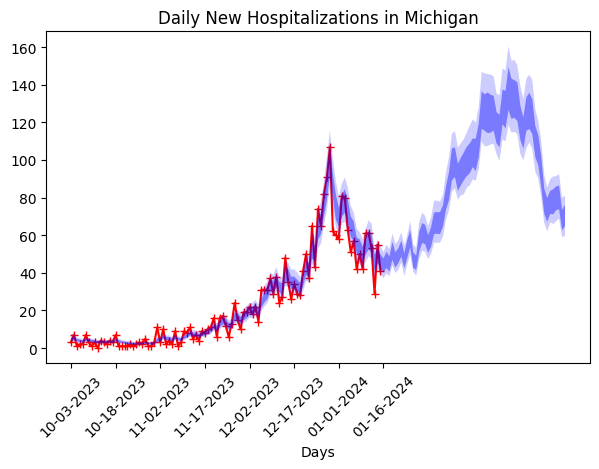

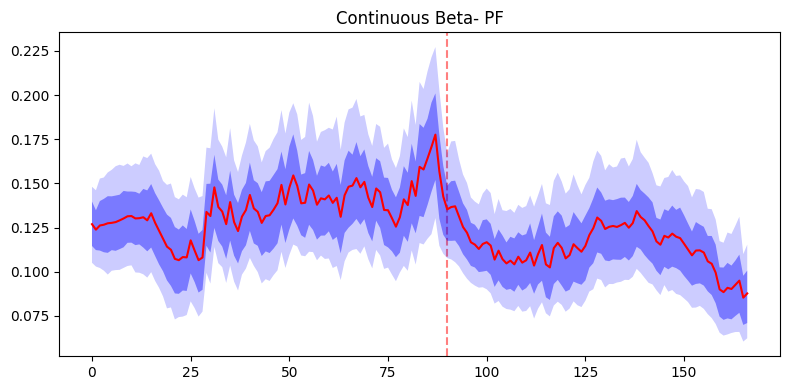

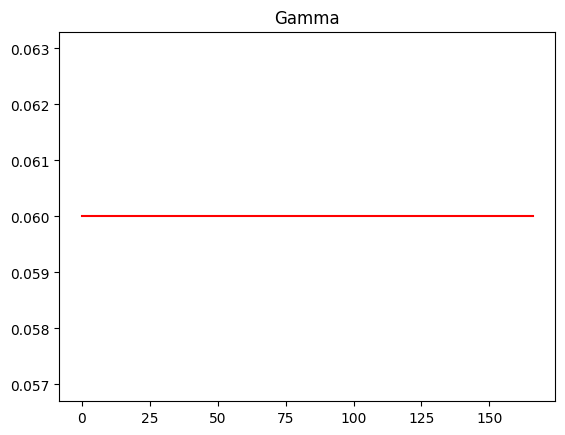

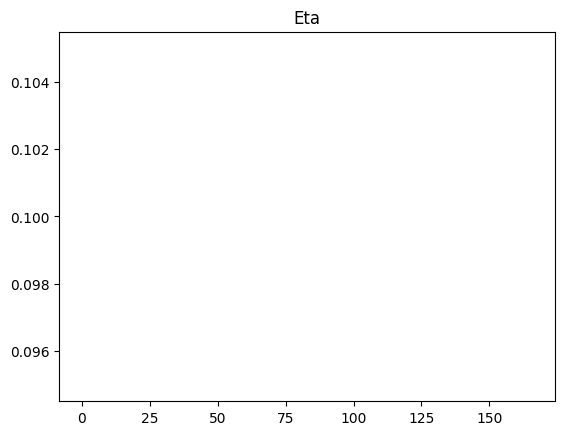

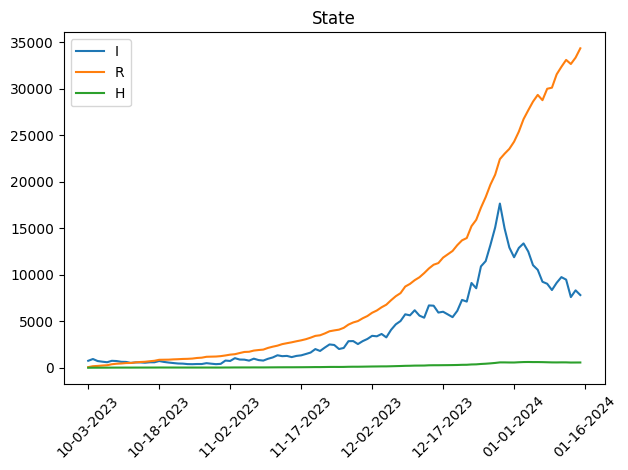

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,timedelta

real_data = pd.read_csv('../datasets/MI_FLU_HOSPITALIZATIONS.csv').to_numpy()
real_data = np.delete(real_data,0,1)

estimated_data = pd.read_csv('../datasets/particle_observation.csv').to_numpy()
estimated_data = np.delete(estimated_data,0,1)


t = 167

d1 = datetime.strptime('2023-10-3', "%Y-%m-%d")

x_interval=np.linspace(0,105,8)

x_interval_int=x_interval.astype('int64')

x_interval_int=x_interval_int.astype(float)

 

date_strings=[]

for d_ind in range(len(x_interval)):

    this_d=d1+timedelta(days=x_interval_int[d_ind])

    date_strings.append(this_d.strftime("%m-%d-%Y"))

plt.title("Daily New Hospitalizations in Michigan")
plt.xlabel("Days")
plt.xticks(x_interval_int,date_strings,rotation=45)
plt.tight_layout()

plt.fill_between(np.arange(0,t), estimated_data[:,3], estimated_data[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), estimated_data[:,6], estimated_data[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(np.arange(0,105),real_data[0:105],color='red',marker = "+")
plt.show()

pf_beta = pd.read_csv('../datasets/average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta,0,1)




beta_quantiles = pd.read_csv('../datasets/beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles,0,1)

pf_eta = pd.read_csv('../datasets/average_eta.csv').to_numpy()
pf_eta = np.delete(pf_eta,0,1)
eta_quantiles = pd.read_csv('../datasets/eta_quantiles.csv').to_numpy()
eta_quantiles = np.delete(eta_quantiles,0,1)

pf_gamma = pd.read_csv('../datasets/average_gamma.csv').to_numpy()
pf_gamma = np.delete(pf_gamma,0,1)
gamma_quantiles = pd.read_csv('../datasets/gamma_quantiles.csv').to_numpy()
gamma_quantiles = np.delete(gamma_quantiles,0,1)

pf_state = pd.read_csv('../datasets/ESTIMATED_STATE.csv').to_numpy()
pf_state = np.delete(pf_state,0,1)

plt.figure(figsize=(8,4))
plt.title("Continuous Beta- PF")


plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[0:t,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[0:t,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.axvline(x = 90, color = 'red', linestyle = '--', alpha = 0.5,label = "forecast point")
plt.plot(pf_beta[0:t],color="red",zorder=12)
# plt.xticks(x_interval_int,date_strings,rotation=45)
plt.tight_layout()
plt.savefig('Beta.png')
plt.show()

plt.title("Gamma")

plt.plot(pf_gamma,zorder=12,color = 'red')
plt.fill_between(np.arange(0,t), gamma_quantiles[:,3], gamma_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), gamma_quantiles[:,6], gamma_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.title("Eta")

plt.fill_between(np.arange(0,t), eta_quantiles[:,3], eta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), eta_quantiles[:,6], eta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.title("State")

labels = ['S','I','R','H']
for i in range(1,4):
    plt.plot(pf_state[0:105,i],label = labels[i])
plt.xticks(x_interval_int,date_strings,rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
    

plt.savefig('State.png')

